In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error

In [65]:
df = pd.read_csv(r'D:\git\house price pred\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [66]:
test = pd.read_csv(r'D:\git\house price pred\housing_test(2).csv')
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [67]:
df.shape

(545, 13)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [69]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df.shape

(530, 13)

In [71]:
df['bedroom_bathroom_ratio'] = (df['bedrooms'] / df['bathrooms']).astype(float).round(2)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,4.0
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,2.0
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,1.5
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,1.5
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,1.5


In [72]:
test['bedroom_bathroom_ratio'] = (test['bedrooms'] / test['bathrooms']).astype(float).round(2)
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,2.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1.5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,4.0


In [73]:
df.skew(numeric_only=True)

price                     0.695755
area                      1.222031
bedrooms                  0.525848
bathrooms                 1.431571
stories                   1.098419
parking                   0.889457
bedroom_bathroom_ratio    0.450036
dtype: float64

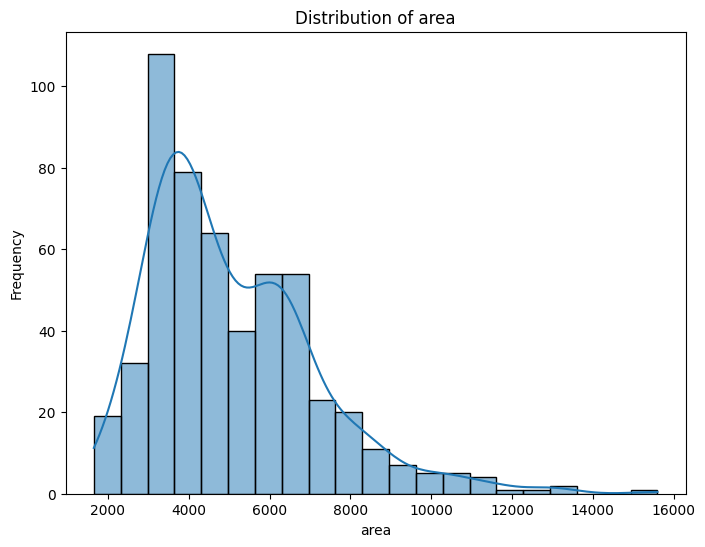

In [74]:
plt.figure(figsize=(8,6))
sns.histplot(df['area'],kde=True)
plt.xlabel('area')
plt.ylabel('Frequency')
plt.title('Distribution of area')
plt.show()

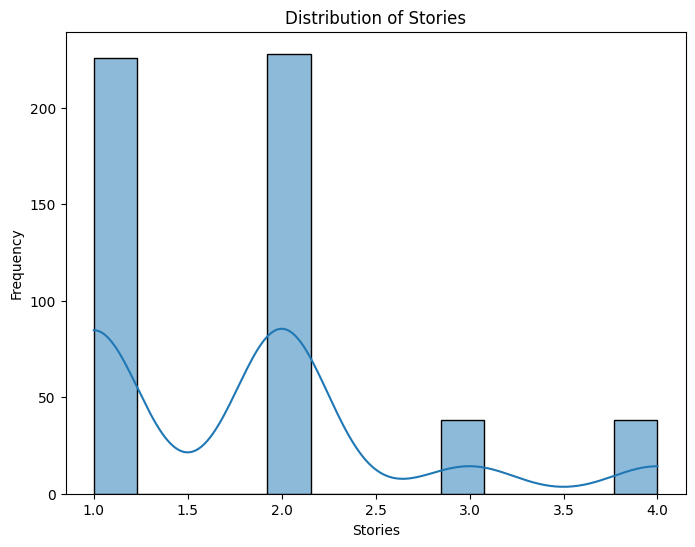

In [75]:
plt.figure(figsize=(8,6))
sns.histplot(df['stories'], kde=True)
plt.xlabel('Stories')
plt.ylabel('Frequency')
plt.title('Distribution of Stories')
plt.show()

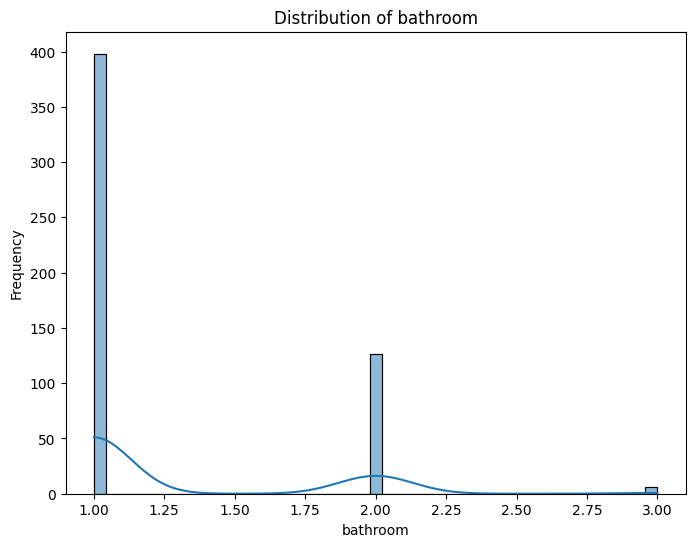

In [76]:
plt.figure(figsize=(8,6))
sns.histplot(df['bathrooms'], kde=True)
plt.xlabel('bathroom')
plt.ylabel('Frequency')
plt.title('Distribution of bathroom')
plt.show()

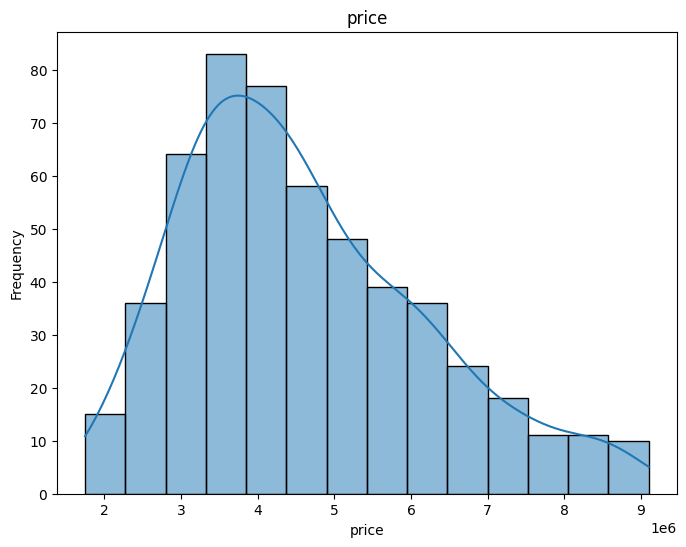

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(df['price'],kde=True)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price')
plt.show()

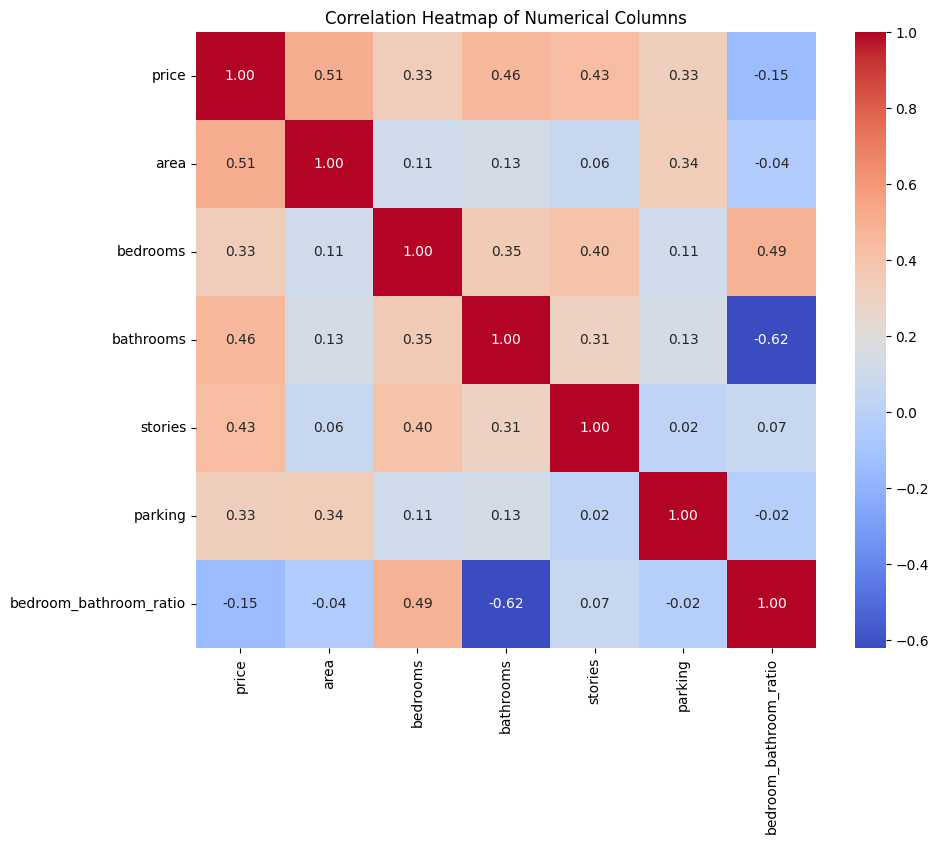

In [78]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [79]:
df['price'] = np.log(df['price']+1)

In [80]:
column = ['area', 'bathrooms','stories', 'parking']
pt = PowerTransformer(method='yeo-johnson')

for col in column:
    df[col] = pt.fit_transform(df[[col]])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
15,16.023785,0.646556,4,-0.575884,0.549095,yes,no,yes,no,no,1.376165,no,semi-furnished,4.0
16,16.023785,0.883456,4,1.733311,0.549095,yes,yes,yes,no,yes,0.856623,yes,unfurnished,2.0
17,16.008281,1.500648,3,1.733311,1.818142,yes,no,no,no,yes,1.376165,no,furnished,1.5
18,16.000438,-0.026827,3,1.733311,0.549095,yes,yes,no,no,yes,1.376165,no,furnished,1.5
19,15.996493,0.814976,3,1.733311,0.549095,yes,no,no,no,yes,0.856623,yes,semi-furnished,1.5


In [81]:
columns = ['area', 'bedrooms', 'stories', 'parking', 'price', 'bedroom_bathroom_ratio']
df[columns].skew()

area                      0.003754
bedrooms                  0.525848
stories                   0.131414
parking                   0.344915
price                    -0.075412
bedroom_bathroom_ratio    0.450036
dtype: float64

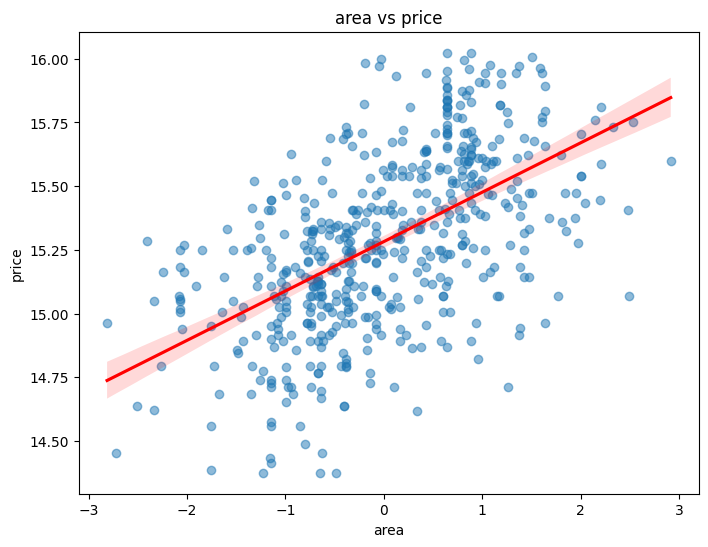

In [82]:
plt.figure(figsize=(8,6))
sns.regplot(x='area', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('area')  
plt.ylabel('price')
plt.title('area vs price')
plt.show()

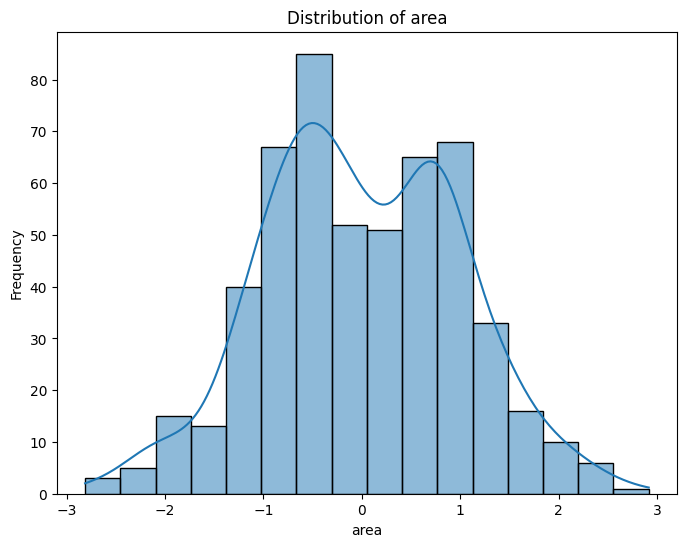

In [83]:
plt.figure(figsize=(8,6))
sns.histplot(df['area'],kde=True)
plt.xlabel('area')
plt.ylabel('Frequency')
plt.title('Distribution of area')
plt.show()

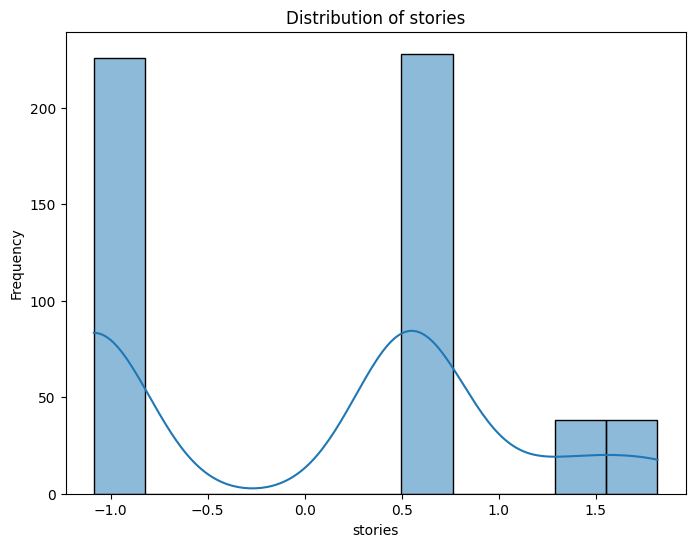

In [84]:
plt.figure(figsize=(8,6))
sns.histplot(df['stories'],kde=True)
plt.xlabel('stories')
plt.ylabel('Frequency')
plt.title('Distribution of stories')
plt.show()

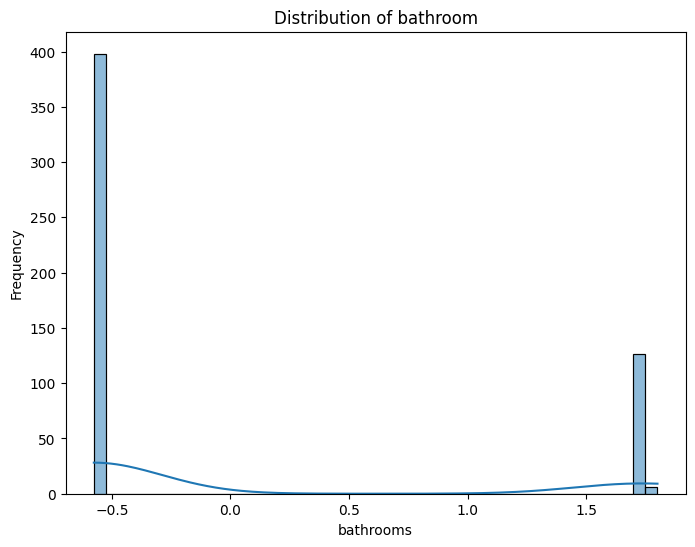

In [85]:
plt.figure(figsize=(8,6))
sns.histplot(df['bathrooms'],kde=True)
plt.xlabel('bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of bathroom')
plt.show()

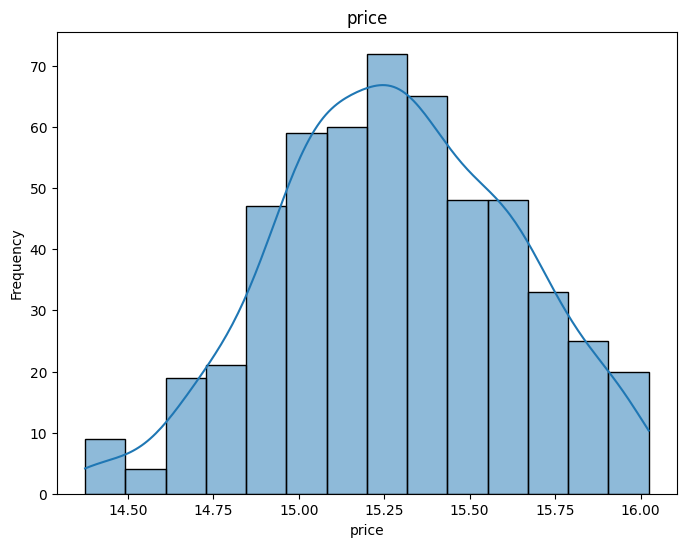

In [86]:
plt.figure(figsize=(8,6))
sns.histplot(df['price'],kde=True)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price')
plt.show()

In [87]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})
df.head()

C:\Users\karthikeyan.s\AppData\Local\Temp\ipykernel_18176\4044604013.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
15,16.023785,0.646556,4,-0.575884,0.549095,1,0,1,0,0,1.376165,0,semi-furnished,4.0
16,16.023785,0.883456,4,1.733311,0.549095,1,1,1,0,1,0.856623,1,unfurnished,2.0
17,16.008281,1.500648,3,1.733311,1.818142,1,0,0,0,1,1.376165,0,furnished,1.5
18,16.000438,-0.026827,3,1.733311,0.549095,1,1,0,0,1,1.376165,0,furnished,1.5
19,15.996493,0.814976,3,1.733311,0.549095,1,0,0,0,1,0.856623,1,semi-furnished,1.5


In [88]:
encoder = LabelEncoder()
df['furnishingstatus'] = encoder.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
15,16.023785,0.646556,4,-0.575884,0.549095,1,0,1,0,0,1.376165,0,1,4.0
16,16.023785,0.883456,4,1.733311,0.549095,1,1,1,0,1,0.856623,1,2,2.0
17,16.008281,1.500648,3,1.733311,1.818142,1,0,0,0,1,1.376165,0,0,1.5
18,16.000438,-0.026827,3,1.733311,0.549095,1,1,0,0,1,1.376165,0,0,1.5
19,15.996493,0.814976,3,1.733311,0.549095,1,0,0,0,1,0.856623,1,1,1.5


In [89]:
pt = PowerTransformer(method='yeo-johnson')
df['furnishingstatus'] = pt.fit_transform(df[['furnishingstatus']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
15,16.023785,0.646556,4,-0.575884,0.549095,1,0,1,0,0,1.376165,0,-0.091566,4.0
16,16.023785,0.883456,4,1.733311,0.549095,1,1,1,0,1,0.856623,1,1.200558,2.0
17,16.008281,1.500648,3,1.733311,1.818142,1,0,0,0,1,1.376165,0,-1.436556,1.5
18,16.000438,-0.026827,3,1.733311,0.549095,1,1,0,0,1,1.376165,0,-1.436556,1.5
19,15.996493,0.814976,3,1.733311,0.549095,1,0,0,0,1,0.856623,1,-0.091566,1.5


In [90]:
Y = df['price']
X = df.drop(columns=['price'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [91]:
intercept = model.intercept_
print("Intercept:", intercept)
slope = model.coef_
print("Coefficients:", slope)
r_squared = r2_score(Y_test, Y_pred)
print("R-squared:", r_squared)


Intercept: 15.003125571854985
Coefficients: [ 0.10792706  0.06882454  0.03644355  0.06225971  0.09617114  0.06893692
  0.08431089  0.14414127  0.15136325  0.03013467  0.12710531 -0.03379668
 -0.05020779]
R-squared: 0.6601511347548674


In [92]:
def transform_dataframe(test):
    test = test.copy()

    yeojohnson_cols = ['area', 'bathrooms', 'stories', 'parking']
    pt = PowerTransformer(method='yeo-johnson')
    num_cols = [col for col in yeojohnson_cols if col in test.columns]
    if num_cols:
        test[num_cols] = pt.fit_transform(test[num_cols])

    binary_cols = ['mainroad', 'guestroom', 'basement',
                   'hotwaterheating', 'airconditioning', 'prefarea']
    for col in binary_cols:
        if col in test.columns:
            test[col] = test[col].map({'yes': 1, 'no': 0})
            test[col] = test[col].fillna(0)


    if 'furnishingstatus' in test.columns:
        test['furnishingstatus'] = test['furnishingstatus'].map({ 'semi-furnished': 1, 'unfurnished': 2, 'furnished': 0 })
        test['furnishingstatus'] = test['furnishingstatus'].fillna(0)
        test['furnishingstatus'].astype(int)

    test = test.fillna(0)


    return test


In [93]:
input_data = pd.DataFrame([[7420,4,2,3,1,0,0,0,1,2,1,0,2]], columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus','bedroom_bathroom_ratio'])
transformed_input_data = transform_dataframe(input_data)

x = model.predict(transformed_input_data)

print("{:.2f}".format(np.exp(x)[0]))

3905936.60


In [94]:
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,2.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1.5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,4.0


In [95]:
X = test.drop('price',axis=1)
pred_test = transform_dataframe(X)
pred_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio
0,1.115457,4,1.661186,1.330576,1,0,0,0,1,1.347305,1,0,2.0
1,1.559601,4,1.767283,1.814641,1,0,0,0,1,1.614159,0,0,1.0
2,1.804291,3,1.661186,0.521478,1,0,1,0,0,1.347305,1,1,1.5
3,1.140991,4,1.661186,0.521478,1,0,1,0,1,1.614159,1,0,2.0
4,1.115457,4,-0.599199,0.521478,1,1,1,0,1,1.347305,0,0,4.0


In [96]:
test['price_pred'] = model.predict(pred_test)

In [97]:
test['price_pred'] = np.exp(test['price_pred']).astype(float).round(2)
test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_bathroom_ratio,price_pred
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,2.0,7702204.90
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.0,7803639.09
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1.5,6827145.27
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2.0,8054578.14
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,4.0,6261895.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,2.0,3195800.76
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,3.0,2462828.16
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,2.0,2896542.01
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,3.0,2694964.30


In [98]:
mae = mean_absolute_error(test['price'], test['price_pred'])
mse = mean_squared_error(test['price'], test['price_pred'])
rmse = root_mean_squared_error(test['price'], test['price_pred'])

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1333364134381.3733
Mean Absolute Error (MAE): 801201.1741834861
Root Mean Squared Error (RMSE): 1154713.87554726


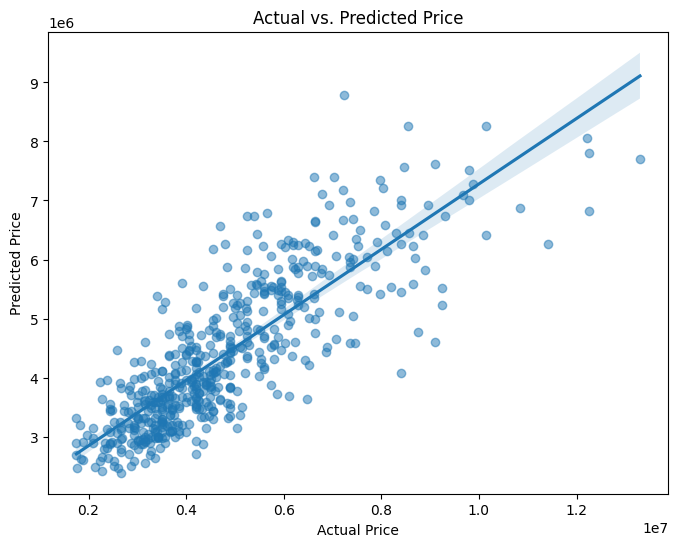

In [99]:
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='price_pred', data=test, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

In [100]:
import pickle

filename = "trained_model.sav"
with open(filename, "wb") as f:
    pickle.dump(model, f)